## Using delta_v and delta_x from simulation

In [1]:
%matplotlib inline

#import sys
import numpy as np
#np.set_printoptions(threshold=sys.maxsize)
import matplotlib.pyplot as plt
import matplotlib.colors as cm
import pynbody
from michaels_functions import (center_and_r_vir, remove_bulk_velocity,
                                read_unit_from_info)
from matplotlib.colors import LogNorm
from matplotlib.pyplot import figure

In [2]:
run = "hydro_59"
out = "output_00050"
path = "bulk1/data_2/" + run + "/output/"
data = pynbody.load(path + out)
aexp = data.properties['a']
data.physical_units()

r_vir = center_and_r_vir(data, aexp, path)
remove_bulk_velocity(data)
r_e = 0.1 * r_vir

sph_5 = pynbody.filt.Sphere(radius='%f kpc' % r_e)
region = data[sph_5]

omega_b, unit_l, unit_d, unit_t = read_unit_from_info(data)

('shifting on Stars:', SimArray([ 0.00308878, -0.03302971, -0.04676732], 'kpc'))
('virial radius:', SimArray(152.40432611, 'kpc'))


In [4]:
m_baryon = np.unique(region.dm["mass"])
m_baryon

SimArray([195711.78358778], 'Msol')

In [5]:
np.log10(m_baryon)

SimArray([5.29161697], 'Msol')

In [6]:
np.sum(region.stars["mass"])

SimArray(1.82457802e+10, 'Msol')

In [7]:
np.sum(region.dm["mass"])

SimArray(1.14278459e+11, 'Msol')

In [8]:
r_vir

SimArray(152.40432611, 'kpc')

In [9]:
sph_3 = pynbody.filt.Sphere(radius='%f kpc' % r_vir)
halo = data[sph_3]

In [10]:
np.sum(halo.dm["mass"])

SimArray(7.85575161e+11, 'Msol')

In [11]:
np.sum(halo.g["mass"])

/home/cluster/mkrets/anaconda2/lib/python2.7/site-packages/pynbody-0.47-py2.7-linux-x86_64.egg/pynbody/snapshot/__init__.py:1443: RuntimeWarning: Conjoining derived and non-derived arrays. Assuming result is non-derived, so no further updates will be made.
  "Conjoining derived and non-derived arrays. Assuming result is non-derived, so no further updates will be made.", RuntimeWarning)


SimArray(4.01854402e+10, 'Msol')

In [12]:
np.sum(halo["mass"])

SimArray(8.47388005e+11, 'Msol')

In [69]:
np.mean(region.gas["smooth"])*1e3

SimArray(186.07890311, 'kpc')

In [14]:
# declaring constants
m_p = pynbody.array.SimArray(1.672621e-24, "g")
G = pynbody.array.SimArray(6.6732e-8, "cm**3 g**-1 s**-2")
T_mean = pynbody.array.SimArray(10., "K")
K_b = pynbody.array.SimArray(1.380622e-16, "g cm**2 s**-2 K**-1")
K_b_ev = pynbody.array.SimArray(8.617e-5, "eV K**-1")
K_b_erg = pynbody.array.SimArray(1.380622e-16, "erg K**-1")
c_cgs = pynbody.array.SimArray(2.9979245e10, "cm s**-1")
h_ev = pynbody.array.SimArray(4.135667e-15, "eV s")
mH_cgs = pynbody.array.SimArray(1.6735575e-24, 'g')  # hydrogen mass
eV_to_ergs = pynbody.array.SimArray(1.60218e-12, "erg eV**-1")
L_sun = pynbody.array.SimArray(3.839e33, "erg s**-1")
M_sun = pynbody.array.SimArray(2e33, "g")

In [15]:
# loading all the arrays saved by the python script
X_H2_bar = np.load('outputs/debug_1.3/X_H2_bar_' + run + '_' + out + '.npy')
X_CO_bar = np.load('outputs/debug_1.3/X_CO_bar_' + run + '_' + out + '.npy')
mach_no_arr = np.load('outputs/debug_1.3/mach_no_arr_' + run + '_' + out + '.npy')
n_H_mean_arr = pynbody.array.SimArray(np.load('outputs/debug_1.3/n_H_mean_arr_' + run + '_' + out + '.npy'),\
                                      "cm**-3")
metal_arr = np.load('outputs/debug_1.3/metal_arr_' + run + '_' + out + '.npy')
temperature = np.load('outputs/debug_1.3/T_' + run + '_' + out + '.npy')
l_CO_bar = np.load('outputs/debug_1.3/l_CO_bar_' + run + '_' + out + '.npy')
l_CO_SI_bar = np.load('outputs/debug_1.3/l_CO_SI_bar_' + run + '_' + out + '.npy')
m_H2_bar = np.load('outputs/debug_1.3/m_H2_bar_' + run + '_' + out + '.npy')
mass = np.load('outputs/debug_1.3/mass_' + run + '_' + out + '.npy')
cell_width_arr = region.gas["smooth"].in_units('cm')
n_H2_mean = pynbody.array.SimArray(X_H2_bar * n_H_mean_arr, "cm**-3")

In [16]:
%%time
min_H = np.min(X_H2_bar)
max_H = np.max(X_H2_bar)
min_C = np.min(X_CO_bar)
max_C = np.max(X_CO_bar)
min_n = np.log10(np.min(n_H_mean_arr))
max_n = np.log10(np.max(n_H_mean_arr))
min_M = np.min(mach_no_arr)
max_M = np.max(mach_no_arr)
min_Z = np.min(metal_arr)
max_Z = np.max(metal_arr)
region.gas["X_H2_bar"] = X_H2_bar
region.gas["X_CO_bar"] = X_CO_bar
region.gas["n_H_mean_arr"] = n_H_mean_arr
region.gas["mach_no_arr"] = mach_no_arr
region.gas["Z_arr"] = metal_arr

CPU times: user 54.2 ms, sys: 599 ms, total: 653 ms
Wall time: 663 ms


In [17]:
L_CO = np.sum(l_CO_bar*(cell_width_arr**3))
print np.log10(L_CO/L_sun)

3.463094820902657


In [18]:
mass_galaxy = np.sum(mass * X_H2_bar)
print mass_galaxy/1e9

2.863026956050193


In [19]:
mass_galaxy = np.sum(m_H2_bar/M_sun)
print mass_galaxy/1e9

2.8471647994275067


In [20]:
L_CO_SI = np.sum(l_CO_SI_bar*(cell_width_arr**3)/M_sun)
print L_CO_SI/1e8

7.461168682125999


In [76]:
alpha_CO = L_CO_SI/mass_galaxy
alpha_CO

SimArray(0.26205609, 'cm**3')

In [77]:
mass_galaxy/L_CO_SI

SimArray(3.81597699, 'cm**-3')

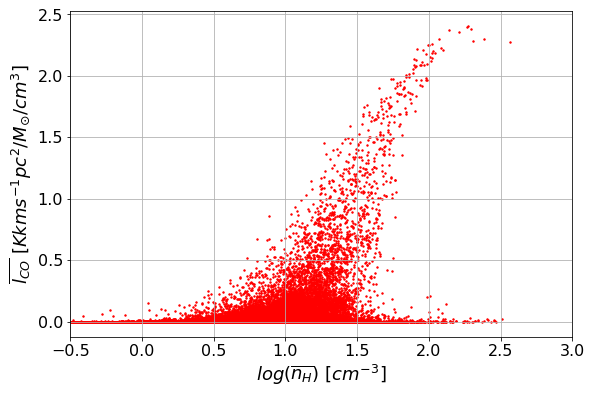

In [74]:
fig, ax = plt.subplots(figsize=(9,6))
plt.rc('figure', titlesize=18)
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels
plt.rc('legend', fontsize=16)    # legend fontsize

# plt.scatter(np.log10(n_H_mean_arr), n_H2_mean/n_H_mean_arr, 
#                       c="k", label="$n_{H2, mean}/n_{H, mean}$", s=2)
plt.scatter(np.log10(n_H_mean_arr), l_CO_SI_bar/n_H_mean_arr/m_p, 
                      c="r", s=2)
plt.xlabel('$log(\overline{n_{H}}) \ [cm^{-3}]$')
plt.ylabel('$\overline{l_{CO}} \ [K km s^{-1} pc^{2}/M_{\odot}/cm^{3}]$')
# ax.set_ylim([-0.1,0.5])
ax.set_xlim([-0.5, 3])
# legend = plt.legend(loc="upper left")
# legend.legendHandles[0]._sizes = [30]
# legend.legendHandles[1]._sizes = [30]
plt.grid(b=True, which='both', axis='both')
# plt.title("$delta_{v}$ & $delta_{x}$ - from sim")
plt.savefig('outputs/debug_1.3/log(n_H_mean)vsl_CO-sim.png', 
            dpi=300, bbox_inches='tight')
plt.show()

/net/cephfs/home/mkrets/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()


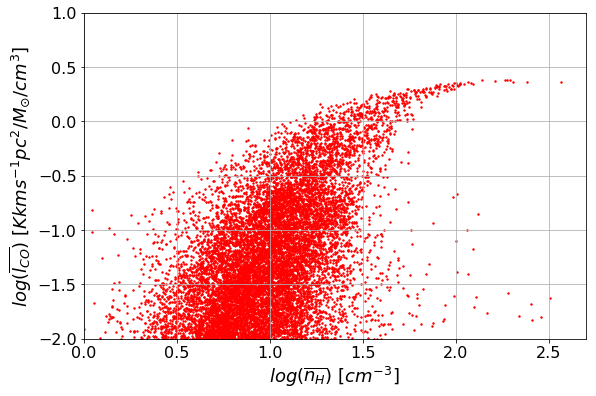

In [75]:
fig, ax = plt.subplots(figsize=(9,6))
plt.rc('figure', titlesize=18)
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels
plt.rc('legend', fontsize=16)    # legend fontsize

# plt.scatter(np.log10(n_H_mean_arr), n_H2_mean/n_H_mean_arr, 
#                       c="k", label="$n_{H2, mean}/n_{H, mean}$", s=2)
plt.scatter(np.log10(n_H_mean_arr), np.log10(l_CO_SI_bar/n_H_mean_arr/m_p), 
                      c="r", s=2)
plt.xlabel('$log(\overline{n_{H}}) \ [cm^{-3}]$')
plt.ylabel('$log(\overline{l_{CO}}) \ [K km s^{-1} pc^{2}/M_{\odot}/cm^{3}]$')
ax.set_ylim([-2,1.0])
ax.set_xlim([0, 2.7])
# legend = plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
# legend.legendHandles[0]._sizes = [30]
# legend.legendHandles[1]._sizes = [30]
plt.grid(b=True, which='both', axis='both')
# plt.title("$delta_{v}$ & $delta_{x}$ - from sim")
plt.savefig('outputs/debug_1.3/log(n_H_mean)vsothers-zoomed-comp.png', 
            dpi=300, bbox_inches='tight')
plt.show()

/net/cephfs/home/mkrets/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


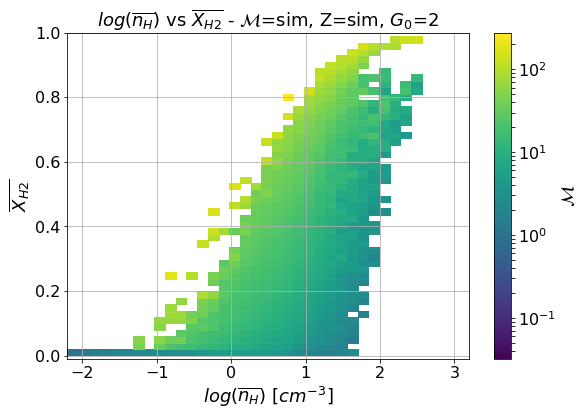

In [48]:
fig, ax = plt.subplots(figsize=(9,6))
plt.rc('figure', titlesize=18)
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels
plt.rc('legend', fontsize=16)    # legend fontsize
histX_H2_M_mass, yedges, xedges = np.histogram2d(X_H2_bar, np.log10(n_H_mean_arr),
                               weights=mach_no_arr * region.gas["mass"], bins=50 , 
                                                 range=[[min_H,max_H],[min_n,max_n]])
histX_H2_mass, yedges, xedges = np.histogram2d(X_H2_bar, np.log10(n_H_mean_arr),
                               weights=region.gas["mass"], bins=50 , 
                                               range=[[min_H,max_H],[min_n,max_n]])

yX_H2_M, xX_H2_M = yedges, xedges
plt.pcolormesh(xedges, yedges, histX_H2_M_mass/histX_H2_mass, 
               norm=LogNorm(), vmin=min_M, vmax=max_M, cmap='viridis')
ax.set_ylim([-0.009,1.0])
ax.set_xlim([-2.2, 3.2])
plt.colorbar(label=r"$\mathcal{M}$")
plt.xlabel('$log(\overline{n_{H}})\ [cm^{-3}]$')
plt.ylabel('$\overline{X_{H2}}$')
plt.grid(b=True, which='both', axis='both')
plt.title('$log(\overline{n_{H}})$ vs $\overline{X_{H2}}$ - $\mathcal{M}$=sim, Z=sim, $G_0$=2')
plt.savefig('outputs/debug_1.3/Hist-X_H2_bar-n_H_mean-M.png', 
            dpi=300, bbox_inches='tight')
plt.show()



In [1]:
fig, ax = plt.subplots(figsize=(9,6))
plt.rc('figure', titlesize=18)
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels
plt.rc('legend', fontsize=16)    # legend fontsize
histX_H2_M_mass, yedges, xedges = np.histogram2d(X_H2_bar, np.log10(n_H_mean_arr),
                               weights=metal_arr * region.gas["mass"], bins=50 , 
                                                 range=[[min_H,max_H],[min_n,max_n]])
histX_H2_mass, yedges, xedges = np.histogram2d(X_H2_bar, np.log10(n_H_mean_arr),
                               weights=region.gas["mass"], bins=50 , 
                                               range=[[min_H,max_H],[min_n,max_n]])

yX_H2_Z, xX_H2_Z = yedges, xedges
plt.pcolormesh(xedges, yedges, histX_H2_M_mass/histX_H2_mass, 
               norm=LogNorm(), vmin=min_Z, vmax=max_Z, cmap="viridis")
plt.colorbar(label="$Z$")
ax.set_ylim([-0.009,1.0])
ax.set_xlim([-2.2, 3.2])
plt.xlabel('$log(\overline{n_{H}})\ [cm^{-3}]$')
plt.ylabel('$\overline{X_{H2}}$')
plt.grid(b=True, which='both', axis='both')
plt.title('$log(\overline{n_{H}})$ vs $\overline{X_{H2}}$ - $\mathcal{M}$=sim, Z=sim, $G_0$=2')
plt.savefig('outputs/debug_1.3/Hist-X_H2_bar-n_H_mean-Z.png', 
            dpi=300, bbox_inches='tight')
plt.show()



NameError: name 'plt' is not defined

/net/cephfs/home/mkrets/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


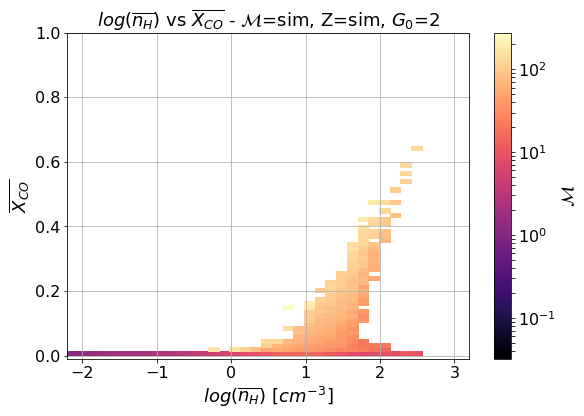

In [50]:
fig, ax = plt.subplots(figsize=(9,6))
plt.rc('figure', titlesize=18)
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels
plt.rc('legend', fontsize=16)    # legend fontsize
histX_CO_M_mass, yedges, xedges = np.histogram2d(X_CO_bar, np.log10(n_H_mean_arr),
                               weights=mach_no_arr * region.gas["mass"], bins=50 , 
                                                 range=[[min_C,max_C],[min_n,max_n]])
histX_CO_mass, yedges, xedges = np.histogram2d(X_CO_bar, np.log10(n_H_mean_arr),
                               weights=region.gas["mass"], bins=50 , 
                                               range=[[min_C,max_C],[min_n,max_n]])

yX_CO_M, xX_CO_M = yedges, xedges
plt.pcolormesh(xedges, yedges, histX_CO_M_mass/histX_CO_mass, 
               norm=LogNorm(), vmin=min_M, vmax=max_M, cmap="magma")
plt.colorbar(label=r"$\mathcal{M}$")
ax.set_ylim([-0.009,1.0])
ax.set_xlim([-2.2, 3.2])
plt.xlabel('$log(\overline{n_{H}})\ [cm^{-3}]$')
plt.ylabel('$\overline{X_{CO}}$')
plt.grid(b=True, which='both', axis='both')
plt.title('$log(\overline{n_{H}})$ vs $\overline{X_{CO}}$ - $\mathcal{M}$=sim, Z=sim, $G_0$=2')
plt.savefig('outputs/debug_1.3/Hist-X_CO_bar-n_H_mean-M.png', 
            dpi=300, bbox_inches='tight')
plt.show()



/net/cephfs/home/mkrets/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


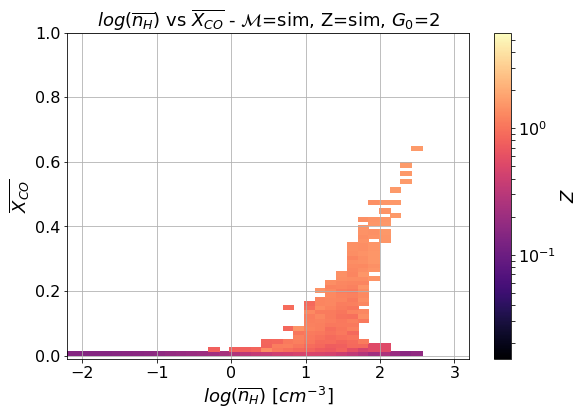

In [51]:
fig, ax = plt.subplots(figsize=(9,6))
plt.rc('figure', titlesize=18)
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels
plt.rc('legend', fontsize=16)    # legend fontsize
histX_CO_M_mass, yedges, xedges = np.histogram2d(X_CO_bar, np.log10(n_H_mean_arr),
                               weights=metal_arr * region.gas["mass"], bins=50 , 
                                                 range=[[min_C,max_C],[min_n,max_n]])
histX_CO_mass, yedges, xedges = np.histogram2d(X_CO_bar, np.log10(n_H_mean_arr),
                               weights=region.gas["mass"], bins=50 , 
                                               range=[[min_C,max_C],[min_n,max_n]])

yX_CO_Z, xX_CO_Z = yedges, xedges
plt.pcolormesh(xedges, yedges, histX_CO_M_mass/histX_CO_mass, 
               norm=LogNorm(), vmin=min_Z, vmax=max_Z, cmap="magma")
plt.colorbar(label="$Z$")
ax.set_ylim([-0.009,1.0])
ax.set_xlim([-2.2, 3.2])
plt.xlabel('$log(\overline{n_{H}})\ [cm^{-3}]$')
plt.ylabel('$\overline{X_{CO}}$')
plt.grid(b=True, which='both', axis='both')
plt.title('$log(\overline{n_{H}})$ vs $\overline{X_{CO}}$ - $\mathcal{M}$=sim, Z=sim, $G_0$=2')
plt.savefig('outputs/debug_1.3/Hist-X_CO_bar-n_H_mean-Z.png', 
            dpi=300, bbox_inches='tight')
plt.show()



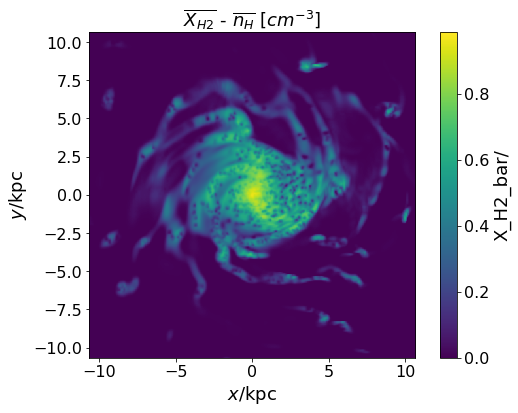

In [55]:
fig, ax = plt.subplots(figsize=(9,6))
plt.rc('figure', titlesize=18)
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels
plt.rc('legend', fontsize=16)    # legend fontsize
pynbody.plot.image(region.g, qty="X_H2_bar", width = r_e*1.4,
                   log=False, resolution=500, cmap="viridis", av_z="n_H_mean_arr",
                   vmin=min_H, vmax=max_H)
plt.title("$\overline{X_{H2}}$ - $\overline{n_{H}}\ [cm^{-3}]$")
plt.savefig('outputs/debug_1.3/X_H2_bar-n_H_mean.png', dpi=300, bbox_inches='tight')
plt.show()


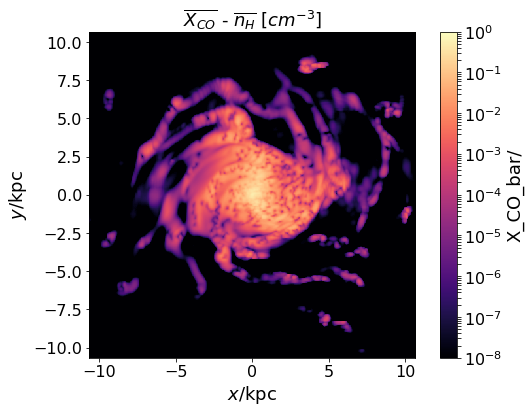

In [52]:
fig, ax = plt.subplots(figsize=(9,6))
plt.rc('figure', titlesize=18)
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels
plt.rc('legend', fontsize=16)    # legend fontsize
pynbody.plot.image(region.g, qty="X_CO_bar", width=r_e*1.4,
                   log=True, resolution=500, cmap="magma", av_z="n_H_mean_arr",
                   vmin=1e-8, vmax=1.0)
plt.title("$\overline{X_{CO}}$ - $\overline{n_{H}}\ [cm^{-3}]$")
plt.savefig('outputs/debug_1.3/X_CO_bar-n_H_mean.png', dpi=300, bbox_inches='tight')
plt.show()


In [41]:
np.mean(cell_width_arr)

SimArray(5.74179996e+20, 'cm')

In [19]:
turb = np.sqrt(region.g["turb"] * 2./3.) * unit_l / unit_t / 1e5
turb = pynbody.array.SimArray(turb*1e5, units="cm s**-1")

In [23]:
np.mean(turb/1e5/np.sqrt(cell_width_arr/3.0e18))

SimArray(2.61527005, 'cm**1/2 s**-1')

In [27]:
np.mean(turb)/1e5

SimArray(32.02810327, 'cm s**-1')

In [43]:
32e5/(5.74e20**0.5)

0.00013356541938074916

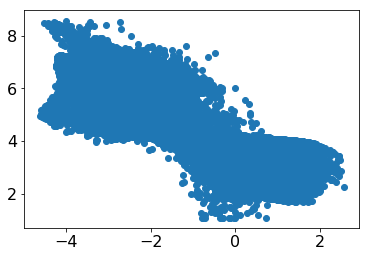

In [76]:
# temperature
# mask_relevant = np.logical_and(temperature < 1e4, n_H_mean_arr > 1e-2)
# original_order = np.arange(len(n_H_mean_arr))
# rel_cells = original_order[mask_relevant]
# plt.scatter(np.log10(n_H_mean_arr[mask_relevant]) ,np.log10(turb[mask_relevant]/1e5))
# plt.scatter(np.log10(n_H_mean_arr[mask_relevant]), np.log10(temperature[mask_relevant]))
plt.scatter(np.log10(n_H_mean_arr), np.log10(temperature))
ax = plt.gca()
# ax.set_xlim([0, 2.5])

In [13]:
M_H = n_H_mean_arr * cell_width_arr**3 * m_p
M_H_galaxy = np.sum(M_H)
print M_H_galaxy/M_sun/1e10
print np.log10(M_H_galaxy/M_sun)

1.2892373104658728
10.110332865483622


/net/cephfs/home/mkrets/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


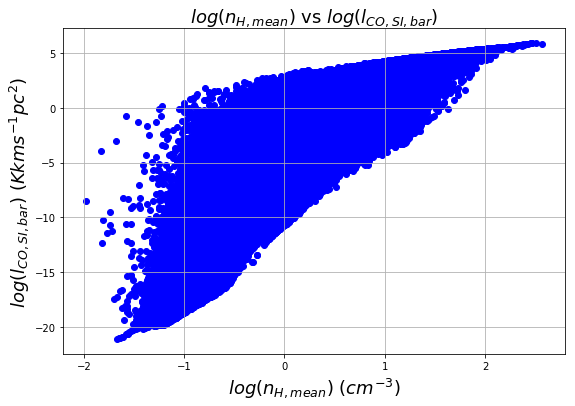

In [35]:
fig, ax = plt.subplots(figsize=(9,6))
plt.rc('figure', titlesize=18)
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.scatter(np.log10(n_H_mean_arr), np.log10(l_CO_SI_bar), 
                      c="b")
plt.xlabel('$log(n_{H, mean}) \ (cm^{-3})$')
plt.ylabel('$log(l_{CO, SI, bar}) \ (K km s^{-1} pc^{2})$')
# ax.set_ylim([-0.1,0.5])
# ax.set_xlim([-4, 7])
plt.grid(b=True, which='both', axis='both')
plt.title("$log(n_{H, mean})$ vs $log(l_{CO, SI, bar})$")
plt.savefig('outputs/debug_1.3/log(n_H_mean)vsl_CO_SI_bar.png', 
            dpi=300, bbox_inches='tight')
plt.show()

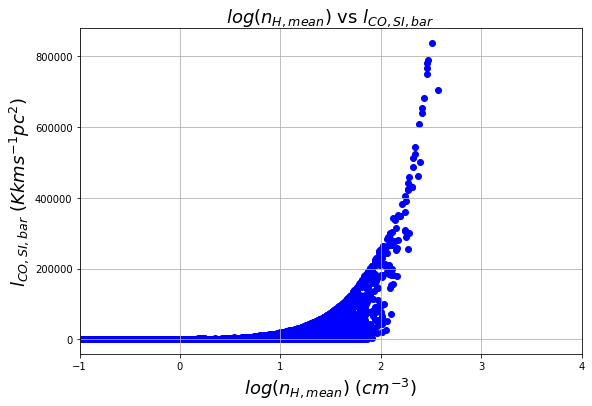

In [36]:
fig, ax = plt.subplots(figsize=(9,6))
plt.rc('figure', titlesize=18)
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.scatter(np.log10(n_H_mean_arr), l_CO_SI_bar, 
                      c="b")
plt.xlabel('$log(n_{H, mean}) \ (cm^{-3})$')
plt.ylabel('$l_{CO, SI, bar} \ (K km s^{-1} pc^{2})$')
# ax.set_ylim([-0.1,5])
ax.set_xlim([-1, 4])
plt.grid(b=True, which='both', axis='both')
plt.title("$log(n_{H, mean})$ vs $l_{CO, SI, bar}$")
plt.savefig('outputs/debug_1.3/log(n_H_mean)vsl_CO_SI_bar.png', 
            dpi=300, bbox_inches='tight')
plt.show()

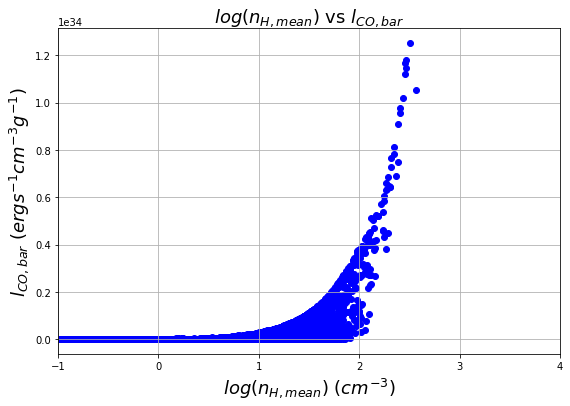

In [37]:
fig, ax = plt.subplots(figsize=(9,6))
plt.rc('figure', titlesize=18)
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.scatter(np.log10(n_H_mean_arr), l_CO_bar, 
                      c="b")
plt.xlabel('$log(n_{H, mean}) \ (cm^{-3})$')
plt.ylabel('$l_{CO, bar} \ (erg s^{-1} cm^{-3} g^{-1})$')
# ax.set_ylim([-3e-5,6e-4])
ax.set_xlim([-1, 4])
plt.grid(b=True, which='both', axis='both')
plt.title("$log(n_{H, mean})$ vs $l_{CO, bar}$")
plt.savefig('outputs/debug_1.3/log(n_H_mean)vsl_CO_bar.png', 
            dpi=300, bbox_inches='tight')
plt.show()

/net/cephfs/home/mkrets/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


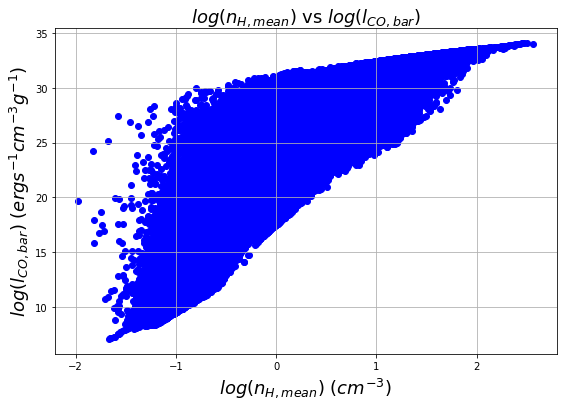

In [38]:
fig, ax = plt.subplots(figsize=(9,6))
plt.rc('figure', titlesize=18)
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.scatter(np.log10(n_H_mean_arr), np.log10(l_CO_bar), 
                      c="b")
plt.xlabel('$log(n_{H, mean}) \ (cm^{-3})$')
plt.ylabel('$log(l_{CO, bar}) \ (erg s^{-1} cm^{-3} g^{-1})$')
# ax.set_ylim([-3e-5,6e-4])
# ax.set_xlim([0, 4])
plt.grid(b=True, which='both', axis='both')
plt.title("$log(n_{H, mean})$ vs $log(l_{CO, bar})$")
plt.savefig('outputs/debug_1.3/log(n_H_mean)vslog(l_CO_bar).png', 
            dpi=300, bbox_inches='tight')
plt.show()

/net/cephfs/home/mkrets/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  
/net/cephfs/home/mkrets/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  


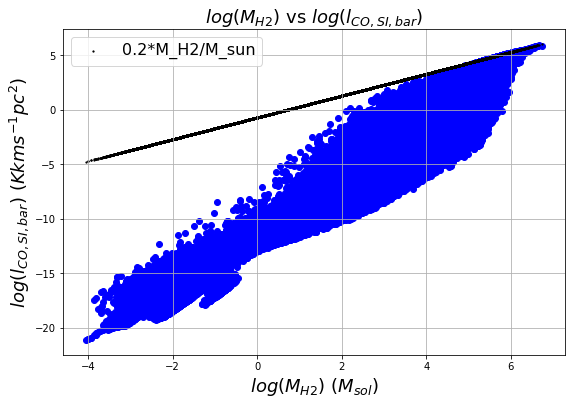

In [135]:
fig, ax = plt.subplots(figsize=(9,6))
plt.rc('figure', titlesize=18)
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.rc('legend', fontsize=16)    # legend fontsize
plt.scatter(np.log10(M_H2/M_sun), np.log10(l_CO_SI_bar), 
                      c="b")
plt.scatter(np.log10(M_H2/M_sun), np.log10(0.2*M_H2/M_sun), c='k', s=1.5, label="0.2*M_H2/M_sun")
plt.xlabel('$log(M_{H2}) \ (M_{sol})$')
plt.ylabel('$log(l_{CO, SI, bar}) \ (K km s^{-1} pc^{2})$')
# ax.set_ylim([-3,7])
# ax.set_xlim([3, 7])
ax.legend(loc = 'upper left')
plt.grid(b=True, which='both', axis='both')
plt.title("$log(M_{H2})$ vs $log(l_{CO, SI, bar})$")
plt.savefig('outputs/debug_1.3/log(M_H2)vslog(l_CO_SI_bar).png', 
            dpi=300, bbox_inches='tight')
plt.show()

/net/cephfs/home/mkrets/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  
/net/cephfs/home/mkrets/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  


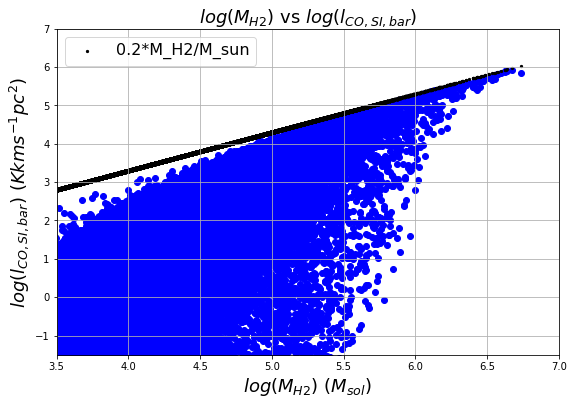

In [136]:
fig, ax = plt.subplots(figsize=(9,6))
plt.rc('figure', titlesize=18)
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.rc('legend', fontsize=16)    # legend fontsize
plt.scatter(np.log10(M_H2/M_sun), np.log10(l_CO_SI_bar), 
                      c="b")
plt.scatter(np.log10(M_H2/M_sun), np.log10(0.2*M_H2/M_sun), c='k', s=5, label="0.2*M_H2/M_sun")
plt.xlabel('$log(M_{H2}) \ (M_{sol})$')
plt.ylabel('$log(l_{CO, SI, bar}) \ (K km s^{-1} pc^{2})$')
ax.set_ylim([-1.5,7])
ax.set_xlim([3.5, 7])
ax.legend(loc = 'upper left')
plt.grid(b=True, which='both', axis='both')
plt.title("$log(M_{H2})$ vs $log(l_{CO, SI, bar})$")
plt.savefig('outputs/debug_1.3/log(M_H2)vslog(l_CO_SI_bar)-zoomed.png', 
            dpi=300, bbox_inches='tight')
plt.show()

In [138]:
M_H = n_H_mean_arr * cell_width_arr**3 * m_p

In [140]:
M_H_galaxy = np.sum(M_H)
print M_H_galaxy
print M_H_galaxy/M_sun/1e10
print np.log10(M_H_galaxy/M_sun)

2.5792774764079424e+43
1.2896387382039713
10.110468070006569
